In [1]:
#forecasting is prediction wrt time 
#regression is prediction wrt another value/ multiple values 

In [2]:
#10th nov 2021 

In [3]:
#11/10/2021
#10-nov-2021
#10/11/2021

In [4]:
# yyyy-mm-dd  HH-MM-SS #timestamp in pandas 

In [5]:
import pandas as pd 
demo_date = "11/10/2021"
print(demo_date)

11/10/2021


In [6]:
type(demo_date)

str

In [7]:
#typecasting - converts data from one datatype to another 
#string to timestamp
op = pd.to_datetime(demo_date)
op

Timestamp('2021-11-10 00:00:00')

In [8]:
type(op)

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
#example 2
demo_date2 = "02/12/2021 21:22:29"
op2 = pd.to_datetime(demo_date2)
op2

Timestamp('2021-02-12 21:22:29')

In [12]:
# FORMAT CODES /format specifiers 
# %Y - year
# %m - month 
# %d - day
# %H - hour
# %M - minute 
# %S - seconds 

In [16]:
#EX - 3
demo_date3 = "15|11/2021 19'40.52"
op3 = pd.to_datetime(demo_date3, format = "%d|%m/%Y %H'%M.%S")
op3

Timestamp('2021-11-15 19:40:52')

In [22]:
demo_date4 = "Nov/15/2021"
op4 = pd.to_datetime(demo_date4)
op4

Timestamp('2021-11-15 00:00:00')

In [21]:
from datetime import datetime
print(datetime.now()) 

2021-11-15 14:15:59.967245


In [ ]:
#FORECASTING 
#web scraping - getting info / data from the internet and downloading it (realtime data)

In [23]:
import pandas as pd 

In [ ]:
df = pd.read_html('/content/DailyWiseMarketArrivals.html') #this is not a dataframe, its a list, which has two elements
#first element is one table, 2nd element is the required table 
df

In [26]:
type(df)

list

In [27]:
df = pd.read_html('/content/DailyWiseMarketArrivals.html')[-1] #negative indexing to select the 2nd table 
df #now we get a dataframe 

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4145,06/Nov/2021,BANGALORE,9220,1200,1400,1300
4146,08/Nov/2021,BANGALORE,11740,1000,1200,1100
4147,11/Nov/2021,BANGALORE,11640,900,1000,950
4148,12/Nov/2021,BANGALORE,13770,800,1000,900


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4149 non-null   object
 1   Market                4150 non-null   object
 2   Arrival(q)            4150 non-null   int64 
 3   Price Minimum (Rs/q)  4150 non-null   object
 4   Price Maximum (Rs/q)  4150 non-null   object
 5   Modal Price (Rs/q)    4150 non-null   object
dtypes: int64(1), object(5)
memory usage: 194.7+ KB


In [29]:
df.isnull().sum() #there is 1 null value in the dataframe 

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
df = df.dropna()   #removes the entire row which has this null value
df

In [ ]:
df.isnull().sum() # we dropped the NaN value (not a number)

In [32]:
# df.to_csv('Potato.csv')  #IF you want to save this df as a .csv, you can use this line 
#THIS LINE IS OPTIONAL 

In [ ]:
#for forecasting we are using a library / tool called fbprophet 
# we require date and modal price columns 

In [ ]:
#we rename the columns 
df.rename(columns = {'Date':'ds','Modal Price (Rs/q)':'y'}, inplace = True)
#inplace = True means the df is given as it is 
#if this was not given , it would create a duplicate dataframe 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4149 entries, 0 to 4148
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ds                    4149 non-null   object
 1   Market                4149 non-null   object
 2   Arrival(q)            4149 non-null   int64 
 3   Price Minimum (Rs/q)  4149 non-null   object
 4   Price Maximum (Rs/q)  4149 non-null   object
 5   y                     4149 non-null   object
dtypes: int64(1), object(5)
memory usage: 226.9+ KB


In [ ]:
# The input to Prophet is always a dataframe with two columns: ds and y. 
# The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. 
# The y column must be numeric, and represents the measurement we wish to forecast.

In [ ]:
df_new = df[['ds','y']] #create a new dataframe of only these two columns
df_new

In [ ]:
df_new.info()
#we need ds = datetime64 as the datatype 
#we need y = int64 as the datatype 
#according to fbprophet required format

In [ ]:
df_new['ds'] = pd.to_datetime(df_new['ds']) #typecasting to convert date to pandas time format 
df_new.info()

In [ ]:
#to convert y to int format 
df_new['y'] = df_new['y'].astype(int) #object to int datatype conversion
df_new.info()

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (20,10)) #increase figure size 
plt.scatter(df_new['ds'],df_new['y']) # values from the dataset 
plt.show()

In [ ]:
#  add a threshold/ outlier at 2750  
import numpy as np 
df_new['y'] = np.where(df_new['y']>2750,np.nan, df_new['y']) # if any value is found above the given threshold,then replace it with a null value
df_new

In [47]:
#to see how many null values were added, 
df_new.isnull().sum()

ds     0
y     11
dtype: int64

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (20,10)) #increase figure size 
plt.scatter(df_new['ds'],df_new['y']) # values from the dataset 
plt.show()

In [66]:
#FBProphet 
import fbprophet #importing the algorithm
#op = fbprophet.Prophet() #calling the algorithm
op = fbprophet.Prophet(changepoint_prior_scale=1) #makes the op model more robust and fits the graph nicely 
op.fit(df_new) #fitting the model 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
forecast = op.make_future_dataframe(periods = 600, freq = 'D') #forecast for the prices for the next 365 days  

In [68]:
forecast = op.predict(forecast) #model.predict

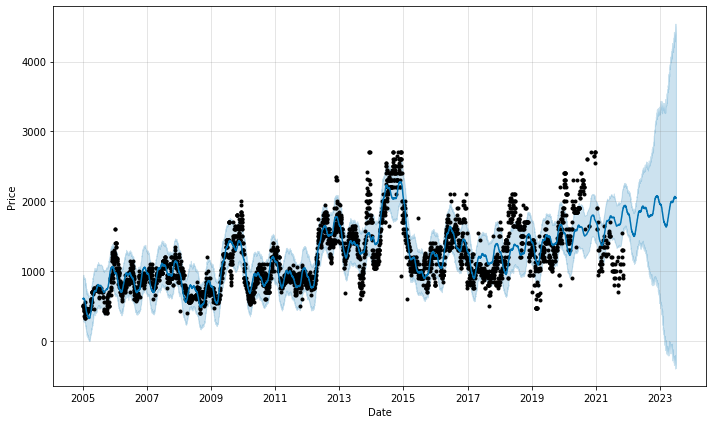

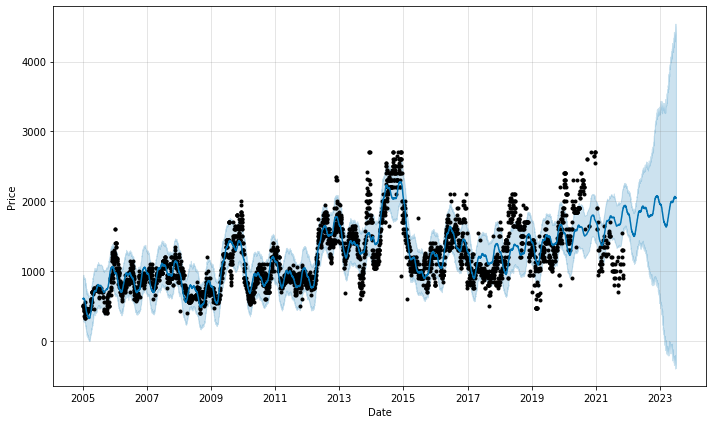

In [70]:
# plt.figure(figsize=(20,10))
op.plot(forecast,xlabel = 'Date',ylabel = 'Price')
# black dots are actual data points
# blue line is the forecasting line 
# the blue shade is telling us that this is the max and min the prices can go upto in the future